# Sistemas Inteligentes
## Maestría en Tecnologías de la Información
## Dr. José Antonio Orizaba Trejo
Fecha: 17 de Febrero 
Alumno: Anaid Trejo Huerta
Código de alumno: 304510062

## importar librerías
pandas para manipular los datos y numpy para estructuras de datos

In [13]:
import pandas as pd
import numpy as np

## Carga de Datos
Se realiza la carga el conjunto de datos desde un archivo CSV utilizando pandas y visualizamos las primeras filas del archivo.

In [14]:
file_path = "Data_Salaries - Data_Salaries.csv"
data = pd.read_csv(file_path)
data.head()

,Company,Company Score,Job Title,Location,Salary
0,PepsiCo,3.9,2025 Summer Intern: R&D,"Plano, TX",$21.50 - $55.40 Per Hour (Employer est.)
1,ghSMART,4.8,Data Engineer Intern,Remote,$20.00 - $30.00 Per Hour (Employer est.)
2,PepsiCo,3.9,2025 Summer Intern: eCommerce Data Science,United States,$21.50 - $40.19 Per Hour (Employer est.)
3,U.S. Bank National Association,3.6,2025 Data Analytics Summer Intern,"Minneapolis, MN",$20.63 - $30.25 Per Hour (Employer est.)
4,Plymouth Rock Assurance,3.4,Fall 2024 Data Science/Predictive Modeler Intern,"Woodbridge, NJ",$77K - $130K (Glassdoor est.)


# Análisis de los datos cargados

Estructura general del conjunto de datos utilizando:
- info(): para observar tipos de datos y valores nulos
- describe(): para obtener estadísticas descriptivas


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        648 non-null    object 
 1   Company Score  551 non-null    float64
 2   Job Title      649 non-null    object 
 3   Location       642 non-null    object 
 4   Salary         503 non-null    object 
dtypes: float64(1), object(4)
memory usage: 25.5+ KB


In [10]:
data.describe(include='all')

,Company,Company Score,Job Title,Location,Salary
count,648,551.000000,649,642,503
unique,492,NaN,616,324,364
top,TikTok,NaN,Engineering Intern,United States,$20.00 Per Hour (Employer est.)
freq,14,NaN,6,43,15
mean,NaN,3.739927,NaN,NaN,NaN
std,NaN,0.510012,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,3.500000,NaN,NaN,NaN
50%,NaN,3.800000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN


# Limpieza de Datos

In [16]:
# eliminar nulos
cleaned_data = data.dropna(subset=['Company','Company Score', 'Job Title', 'Location','Salary'])

 Se normaliza el salario para obtener valores numéricos:
   - Si el salario es por hora (Per Hour), se convierte a anual (multiplicando por 2080 horas/año).
   - Si el salario viene en miles (K), se convierte a dólares.
Se extraen valores mínimo y máximo, y se calcula un salario promedio.

In [23]:
# Se eliminan filas sin salario (porque el análisis principal depende de esa variable).
import re

cleaned_data = data.dropna(subset=["Salary"]).copy()

def parse_salary_to_annual(s: str):
    """
    Devuelve:
    - salary_min_annual
    - salary_max_annual
    - salary_mid_annual
    - pay_type: 'hourly' o 'annual'
    Si no se puede parsear, regresa NaN.
    """
    if pd.isna(s):
        return (np.nan, np.nan, np.nan, np.nan)
    
    s = str(s).replace("\xa0", " ").strip().lower()

    # Detectar si es por hora
    is_hourly = "per hour" in s
    
    # Extraer números que pueden incluir decimales, ej: 21.50, 55.40, 77k, 130k
    # detectar si hay 'k' --> está en miles
    has_k = "k" in s
    # Extraer rangos tipo: "$21.50 - $55.40" o "$77k - $130k"
    # Tomamos todos los números (con decimales)
    nums = re.findall(r"\d+(?:\.\d+)?", s)
    if len(nums) < 1:
        return (np.nan, np.nan, np.nan, np.nan)
    
    # Convertir a float
    nums = [float(x) for x in nums]
    
    # Si hay rango, usamos min/max; si hay solo uno, es min=max
    if len(nums) >= 2:
        min_val, max_val = nums[0], nums[1]
    else:
        min_val = max_val = nums[0]
    
    # Convertir K a dólares (anual)
    if has_k:
        min_val *= 1000
        max_val *= 1000
        pay_type = "annual"
    else:
        # Si no tiene K, podría ser hourly o annual ya en dólares
        pay_type = "hourly" if is_hourly else "annual"
    
    # Si es por hora, convertir a anual (2080 hrs/año)
    if pay_type == "hourly":
        min_annual = min_val * 2080
        max_annual = max_val * 2080
    else:
        min_annual = min_val
        max_annual = max_val
    
    mid_annual = (min_annual + max_annual) / 2
    return (min_annual, max_annual, mid_annual, pay_type)

In [24]:
parsed = cleaned_data["Salary"].apply(parse_salary_to_annual)

cleaned_data[["Salary Min Annual", "Salary Max Annual", "Salary Mid Annual", "Pay Type"]] = pd.DataFrame(parsed.tolist(), index=cleaned_data.index)

# Asegurar numéricos
for col in ["Salary Min Annual", "Salary Max Annual", "Salary Mid Annual"]:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors="coerce")

cleaned_data.head()


,Company,Company Score,Job Title,Location,Salary,Salary Min Annual,Salary Max Annual,Salary Mid Annual,Pay Type
0,PepsiCo,3.9,2025 Summer Intern: R&D,"Plano, TX",$21.50 - $55.40 Per Hour (Employer est.),44720.0,115232.0,79976.0,hourly
1,ghSMART,4.8,Data Engineer Intern,Remote,$20.00 - $30.00 Per Hour (Employer est.),41600.0,62400.0,52000.0,hourly
2,PepsiCo,3.9,2025 Summer Intern: eCommerce Data Science,United States,$21.50 - $40.19 Per Hour (Employer est.),44720.0,83595.2,64157.6,hourly
3,U.S. Bank National Association,3.6,2025 Data Analytics Summer Intern,"Minneapolis, MN",$20.63 - $30.25 Per Hour (Employer est.),42910.4,62920.0,52915.2,hourly
4,Plymouth Rock Assurance,3.4,Fall 2024 Data Science/Predictive Modeler Intern,"Woodbridge, NJ",$77K - $130K (Glassdoor est.),77000.0,130000.0,103500.0,annual


In [25]:
# Eliminar filas donde no se pudo convertir el salario
cleaned_data = cleaned_data.dropna(subset=["Salary Mid Annual"]).copy()

# (Opcional) Limpiar Location: estandarizar "Remote"
cleaned_data["Location"] = cleaned_data["Location"].astype(str).str.strip()

cleaned_data.shape

(503, 9)

## Generación de resultados

Se guarda un archivo CSV con los datos ya limpios y con columnas numéricas listas
para análisis y graficación.

In [27]:
output_path = "resultado_data_salaries.csv"
cleaned_data.to_csv(output_path, index=False)

output_path

'resultado_data_salaries.csv'

## Visualizar los datos en una gráfica

Matplotlib is building the font cache; this may take a moment.


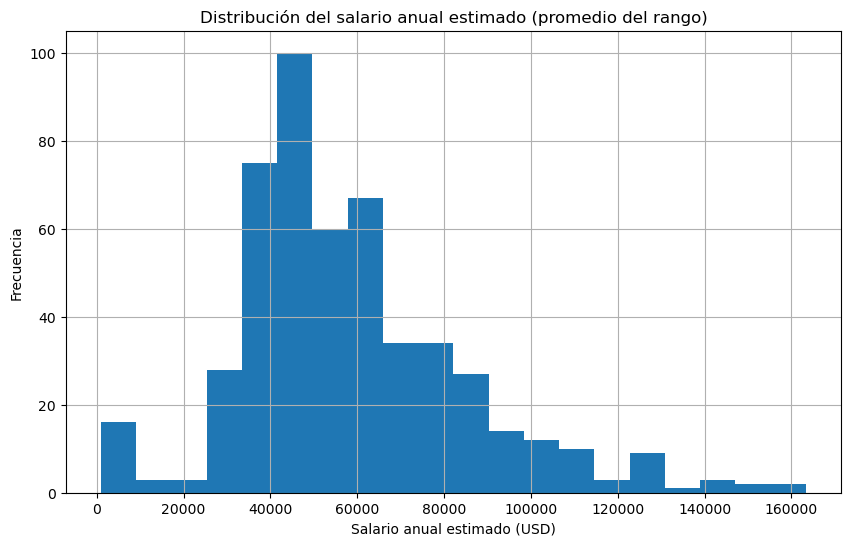

In [28]:
import matplotlib.pyplot as plt

data_to_plot = pd.read_csv("resultado_data_salaries.csv")

plt.figure(figsize=(10, 6))
plt.hist(data_to_plot["Salary Mid Annual"].dropna(), bins=20)

plt.title("Distribución del salario anual estimado (promedio del rango)")
plt.xlabel("Salario anual estimado (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()